In [1]:
from NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wdir = "/home/cosmocicatais/simpleMC/chains_bambi/"
chain_lcdm_hd = "LCDM_phy_HD_nested_dynesty_multi_1.txt"

In [3]:
data = np.loadtxt(wdir+chain_lcdm_hd)

In [4]:
samples = data[:,2:5]
likes = data[:,1]
len(likes)

14037

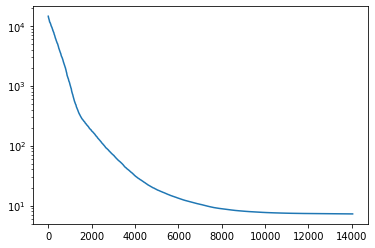

In [5]:
plt.plot(likes)
plt.yscale('log')

In [6]:
network = NeuralNet(samples, likes, [3,100, 100, 100, 100, 100, 1], epochs=300, batch_size=8, scale=[False, True])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [7]:
network.train()

Training...
Epoch 1/300
1404/1404 [==============================] - 2s 881us/step - loss: 2909284.5489 - val_loss: 3156231.0000
Epoch 2/300
1404/1404 [==============================] - 1s 702us/step - loss: 2456795.7990 - val_loss: 2999051.7500
Epoch 3/300
1404/1404 [==============================] - 1s 737us/step - loss: 2386095.8229 - val_loss: 2855868.0000
Epoch 4/300
1404/1404 [==============================] - 1s 752us/step - loss: 2308286.7039 - val_loss: 2669404.7500
Epoch 5/300
1404/1404 [==============================] - 1s 740us/step - loss: 2062149.5013 - val_loss: 2136539.0000
Epoch 6/300
1404/1404 [==============================] - 1s 718us/step - loss: 1323517.4998 - val_loss: 465877.6562
Epoch 7/300
1404/1404 [==============================] - 1s 676us/step - loss: 241640.7358 - val_loss: 76023.9375
Epoch 8/300
1404/1404 [==============================] - 1s 671us/step - loss: 42460.4656 - val_loss: 41363.3438
Epoch 9/300
1404/1404 [==============================] - 1s 

1404/1404 [==============================] - 1s 665us/step - loss: 828.6711 - val_loss: 2718.6814
Epoch 75/300
1404/1404 [==============================] - 1s 659us/step - loss: 1192.3261 - val_loss: 348.3088
Epoch 76/300
1404/1404 [==============================] - 1s 676us/step - loss: 896.1186 - val_loss: 1391.0684
Epoch 77/300
1404/1404 [==============================] - 1s 681us/step - loss: 2158.2767 - val_loss: 258.5689
Epoch 78/300
1404/1404 [==============================] - 1s 663us/step - loss: 298.3300 - val_loss: 201.5965
Epoch 79/300
1404/1404 [==============================] - 1s 667us/step - loss: 2037.6137 - val_loss: 141.6639
Epoch 80/300
1404/1404 [==============================] - 1s 652us/step - loss: 2534.8125 - val_loss: 504.0823
Epoch 81/300
1404/1404 [==============================] - 1s 645us/step - loss: 1119.8535 - val_loss: 174.4963
Epoch 82/300
1404/1404 [==============================] - 1s 654us/step - loss: 754.4695 - val_loss: 276.6072
Epoch 83/300
140

1404/1404 [==============================] - 1s 662us/step - loss: 335.6657 - val_loss: 475.4163
Epoch 148/300
1404/1404 [==============================] - 1s 661us/step - loss: 1456.2602 - val_loss: 4015.3740
Epoch 149/300
1404/1404 [==============================] - 1s 656us/step - loss: 1113.7408 - val_loss: 141.9082
Epoch 150/300
1404/1404 [==============================] - 1s 672us/step - loss: 583.7698 - val_loss: 1294.7513
Epoch 151/300
1404/1404 [==============================] - 1s 641us/step - loss: 1174.7057 - val_loss: 3509.5891
Epoch 152/300
1404/1404 [==============================] - 1s 663us/step - loss: 692.6223 - val_loss: 2192.3867
Epoch 153/300
1404/1404 [==============================] - 1s 673us/step - loss: 1123.7446 - val_loss: 2158.6099
Epoch 154/300
1404/1404 [==============================] - 1s 656us/step - loss: 1221.2443 - val_loss: 137.0574
Epoch 155/300
1404/1404 [==============================] - 1s 637us/step - loss: 768.2038 - val_loss: 3359.6196
Epoc

1404/1404 [==============================] - 1s 657us/step - loss: 553.4976 - val_loss: 372.8509
Epoch 221/300
1404/1404 [==============================] - 1s 651us/step - loss: 869.1138 - val_loss: 107.9416
Epoch 222/300
1404/1404 [==============================] - 1s 646us/step - loss: 574.9356 - val_loss: 364.5663
Epoch 223/300
1404/1404 [==============================] - 1s 652us/step - loss: 1287.2563 - val_loss: 257.9791
Epoch 224/300
1404/1404 [==============================] - 1s 660us/step - loss: 294.5446 - val_loss: 1194.8402
Epoch 225/300
1404/1404 [==============================] - 1s 659us/step - loss: 1379.6418 - val_loss: 216.0106
Epoch 226/300
1404/1404 [==============================] - 1s 661us/step - loss: 533.5035 - val_loss: 71.4673
Epoch 227/300
1404/1404 [==============================] - 1s 647us/step - loss: 660.7582 - val_loss: 131.9960
Epoch 228/300
1404/1404 [==============================] - 1s 657us/step - loss: 418.1076 - val_loss: 268.9628
Epoch 229/300

Epoch 294/300
1404/1404 [==============================] - 1s 659us/step - loss: 2155.3520 - val_loss: 42.9010
Epoch 295/300
1404/1404 [==============================] - 1s 656us/step - loss: 206.8699 - val_loss: 107.1719
Epoch 296/300
1404/1404 [==============================] - 1s 659us/step - loss: 361.8267 - val_loss: 52.8275
Epoch 297/300
1404/1404 [==============================] - 1s 647us/step - loss: 1014.9289 - val_loss: 60.1564
Epoch 298/300
1404/1404 [==============================] - 1s 653us/step - loss: 335.0557 - val_loss: 1585.9185
Epoch 299/300
1404/1404 [==============================] - 1s 652us/step - loss: 974.6338 - val_loss: 50.6700
Epoch 300/300
1404/1404 [==============================] - 1s 650us/step - loss: 801.7339 - val_loss: 168.3994
Training complete!


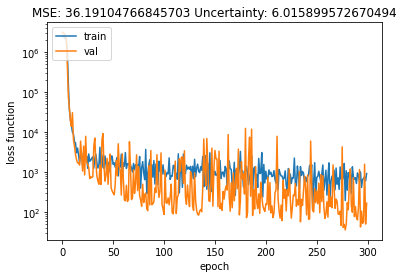

In [8]:
network.plot(ylogscale=True)

In [71]:
r = np.random.randint(len(likes)-1)
# r = np.argmin(likes)
test_sample = samples[r]

new_vector = np.array(test_sample).reshape(1,3)
# new_vector = np.array([0.7,0.5,0.5])
prediction = network.predict(new_vector)


print("Predicción: {}".format(float(prediction)))



Predicción: 303.3648681640625


In [72]:
likes[r], samples[r]

(336.934745299341, array([0.61518977, 0.01031763, 0.57941775]))